<a href="https://colab.research.google.com/github/DAEHO0/python/blob/main/LTV_231010_team_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **군집화 변수**

In [ ]:
# 연령, 평균 구매 금액, 누적 구매 금액(고객별 총매출액), 가입기간, 총 구매 횟수, 최종구매일 경과 기간, 구매제품종류수

# 연령: 가입연도 - 주민번호 앞자리
# 평균 구매 금액: 고객별 평균 구매 금액
# 누적 구매 금액: 고객별 총 매출액
# 가입기간: 고객별 최종구매일 - 회원가입일
# 최종구매일 경과 기간:
# 구매제품종류수:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **데이터 불러오기**

In [ ]:
# 데이터 불러오기
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/diet_군집분석 변수 생성용 데이터.csv', encoding = 'UTF-8')
df


,id,social_id1,created,sub_class_num,p_price,p_quantity,p_created
0,webinner,740101.0,2000-05-12 ㅽ썑 3:38:49,1,900000.0,10,2001-05-21 ㅽ썑 6:21:09
1,webinner,740101.0,2000-05-12 ㅽ썑 3:38:49,1,270000.0,3,2001-05-21 ㅽ썑 6:26:11
2,2094paco,770122.0,2000-10-27 ㅼ쟾 9:43:10,1,90000.0,1,2001-07-02 ㅽ썑 12:22:33
3,kypung1111,701106.0,2001-08-13 ㅽ썑 10:00:41,1,90000.0,1,2001-08-21 ㅽ썑 3:26:29
4,webinner,740101.0,2000-05-12 ㅽ썑 3:38:49,1,320000.0,1,2001-05-23 ㅽ썑 3:11:17
...,...,...,...,...,...,...,...
4453,wka7942,810331.0,2000-06-29 ㅽ썑 12:40:04,5,115000.0,1,2001-07-09 ㅽ썑 2:22:46
4454,swell7,810126.0,2001-06-15 ㅼ쟾 10:10:48,5,115000.0,1,2001-08-01 ㅽ썑 5:04:06
4455,jjhwlgp,830213.0,2001-08-06 ㅼ쟾 1:31:07,5,115000.0,1,2001-08-06 ㅼ쟾 1:35:19
4456,gebb,721117.0,2001-08-12 ㅽ썑 10:53:38,5,115000.0,1,2001-08-12 ㅽ썑 11:02:49


### **군집 분석 변수 설정**

### **age 변수 생성**

In [ ]:
# 연령
import pandas as pd

# 'created' 열에서 연도 정보를 추출하여 'join_year' 열을 생성
df['join_year'] = df['created'].str.extract('(\d{4})').astype(int)

# 결과 출력
df

,id,social_id1,created,sub_class_num,p_price,p_quantity,p_created,join_year
0,webinner,740101.0,2000-05-12 ㅽ썑 3:38:49,1,900000.0,10,2001-05-21 ㅽ썑 6:21:09,2000
1,webinner,740101.0,2000-05-12 ㅽ썑 3:38:49,1,270000.0,3,2001-05-21 ㅽ썑 6:26:11,2000
2,2094paco,770122.0,2000-10-27 ㅼ쟾 9:43:10,1,90000.0,1,2001-07-02 ㅽ썑 12:22:33,2000
3,kypung1111,701106.0,2001-08-13 ㅽ썑 10:00:41,1,90000.0,1,2001-08-21 ㅽ썑 3:26:29,2001
4,webinner,740101.0,2000-05-12 ㅽ썑 3:38:49,1,320000.0,1,2001-05-23 ㅽ썑 3:11:17,2000
...,...,...,...,...,...,...,...,...
4453,wka7942,810331.0,2000-06-29 ㅽ썑 12:40:04,5,115000.0,1,2001-07-09 ㅽ썑 2:22:46,2000
4454,swell7,810126.0,2001-06-15 ㅼ쟾 10:10:48,5,115000.0,1,2001-08-01 ㅽ썑 5:04:06,2001
4455,jjhwlgp,830213.0,2001-08-06 ㅼ쟾 1:31:07,5,115000.0,1,2001-08-06 ㅼ쟾 1:35:19,2001
4456,gebb,721117.0,2001-08-12 ㅽ썑 10:53:38,5,115000.0,1,2001-08-12 ㅽ썑 11:02:49,2001


In [ ]:
# social_id1 데이터 타입 확인
df['social_id1'].info()

# float64 확인

<class 'pandas.core.series.Series'>
RangeIndex: 4458 entries, 0 to 4457
Series name: social_id1
Non-Null Count  Dtype  
--------------  -----  
4457 non-null   float64
dtypes: float64(1)
memory usage: 35.0 KB


In [ ]:
# social_id1 NA 값 변환
import pandas as pd
import numpy as np

# NA 값을 0으로 대체한 후 'social_id1' 열을 정수로 변환
df['social_id1'] = df['social_id1'].fillna(0).astype(int)

# 결과 출력
df

,id,social_id1,created,sub_class_num,p_price,p_quantity,p_created,join_year
0,webinner,740101,2000-05-12 ㅽ썑 3:38:49,1,900000.0,10,2001-05-21 ㅽ썑 6:21:09,2000
1,webinner,740101,2000-05-12 ㅽ썑 3:38:49,1,270000.0,3,2001-05-21 ㅽ썑 6:26:11,2000
2,2094paco,770122,2000-10-27 ㅼ쟾 9:43:10,1,90000.0,1,2001-07-02 ㅽ썑 12:22:33,2000
3,kypung1111,701106,2001-08-13 ㅽ썑 10:00:41,1,90000.0,1,2001-08-21 ㅽ썑 3:26:29,2001
4,webinner,740101,2000-05-12 ㅽ썑 3:38:49,1,320000.0,1,2001-05-23 ㅽ썑 3:11:17,2000
...,...,...,...,...,...,...,...,...
4453,wka7942,810331,2000-06-29 ㅽ썑 12:40:04,5,115000.0,1,2001-07-09 ㅽ썑 2:22:46,2000
4454,swell7,810126,2001-06-15 ㅼ쟾 10:10:48,5,115000.0,1,2001-08-01 ㅽ썑 5:04:06,2001
4455,jjhwlgp,830213,2001-08-06 ㅼ쟾 1:31:07,5,115000.0,1,2001-08-06 ㅼ쟾 1:35:19,2001
4456,gebb,721117,2001-08-12 ㅽ썑 10:53:38,5,115000.0,1,2001-08-12 ㅽ썑 11:02:49,2001


In [ ]:
# social_id1 데이터 타입 확인
df['social_id1'].info()

# int64 확인

<class 'pandas.core.series.Series'>
RangeIndex: 4458 entries, 0 to 4457
Series name: social_id1
Non-Null Count  Dtype
--------------  -----
4458 non-null   int64
dtypes: int64(1)
memory usage: 35.0 KB


In [ ]:
# 'social_id1' 열을 정수형으로 변환하고 19XX로 변환
df['social_id2'] = 1900 + df['social_id1'].astype(str).str[:2].astype(int)
df

,id,social_id1,created,sub_class_num,p_price,p_quantity,p_created,join_year,social_id2
0,webinner,740101,2000-05-12 ㅽ썑 3:38:49,1,900000.0,10,2001-05-21 ㅽ썑 6:21:09,2000,1974
1,webinner,740101,2000-05-12 ㅽ썑 3:38:49,1,270000.0,3,2001-05-21 ㅽ썑 6:26:11,2000,1974
2,2094paco,770122,2000-10-27 ㅼ쟾 9:43:10,1,90000.0,1,2001-07-02 ㅽ썑 12:22:33,2000,1977
3,kypung1111,701106,2001-08-13 ㅽ썑 10:00:41,1,90000.0,1,2001-08-21 ㅽ썑 3:26:29,2001,1970
4,webinner,740101,2000-05-12 ㅽ썑 3:38:49,1,320000.0,1,2001-05-23 ㅽ썑 3:11:17,2000,1974
...,...,...,...,...,...,...,...,...,...
4453,wka7942,810331,2000-06-29 ㅽ썑 12:40:04,5,115000.0,1,2001-07-09 ㅽ썑 2:22:46,2000,1981
4454,swell7,810126,2001-06-15 ㅼ쟾 10:10:48,5,115000.0,1,2001-08-01 ㅽ썑 5:04:06,2001,1981
4455,jjhwlgp,830213,2001-08-06 ㅼ쟾 1:31:07,5,115000.0,1,2001-08-06 ㅼ쟾 1:35:19,2001,1983
4456,gebb,721117,2001-08-12 ㅽ썑 10:53:38,5,115000.0,1,2001-08-12 ㅽ썑 11:02:49,2001,1972


In [ ]:
# id별 연령대 계산
df['age'] = df['join_year'] - df['social_id2']+1

# df에서 id와 age 변수만 추출하여 clstr 데이터프레임에 저장
clstr = df[['id', 'age']].copy()
clstr

,id,age
0,webinner,27
1,webinner,27
2,2094paco,24
3,kypung1111,32
4,webinner,27
...,...,...
4453,wka7942,20
4454,swell7,21
4455,jjhwlgp,19
4456,gebb,30


In [ ]:
# id 중복값 제거
clstr = clstr.drop_duplicates(subset='id')
clstr

# 고객별 총 구매 금액과 평균 구매 금액은
# 중복값이 제거된 clstr이 아닌 df로 계산하기 때문에 상관 없음

,id,age
0,webinner,27
2,2094paco,24
3,kypung1111,32
5,blueseagul,20
6,shy1108,38
...,...,...
4447,juna7663,47
4448,jsunrose,31
4450,altjs5017,20
4452,voraangel,24


### **고객별 총 구매 금액**

In [ ]:
# 고객ID별 총 구매 금액 계산
ttl_prchs = df.groupby('id')['p_price'].sum().reset_index()
ttl_prchs

,id,p_price
0,#joinskyrvic,249000.0
1,#joinsnomyee,35000.0
2,#joinssoon2597,49000.0
3,00eye1,620000.0
4,0120hjw,19900.0
...,...,...
3309,zziyoun,39900.0
3310,zzminho,19500.0
3311,zzoggo,29900.0
3312,zzoggoma,19500.0


In [ ]:
import pandas as pd

# clstr 데이터프레임과 ttl_prchs 데이터프레임을 'id' 열을 기준으로 병합
clstr = pd.merge(clstr, ttl_prchs, on='id', how='left')

# total_purchase 변수가 추가된 clstr 데이터프레임을 출력
clstr

# p_price_x:  'clstr' 데이터프레임에서 가져온 'p_price' 열에 대한 별명
# p_price_y:  'ttl_prchs' 데이터프레임에서 가져온 'p_price' 열에 대한 별명

# 위 코드에서 left_on 및 right_on 인자를 사용하여 각 데이터프레임의 'id' 열을 기준으로
# 병합하고, how 인자를 'left'로 설정하여 'clstr' 데이터프레임의 모든 행을 유지하면서
# 'ttl_prchs' 데이터프레임을 병합합니다. 결과로 'total_purchase' 열이 추가된 clstr 데이터프레임을 얻을 수 있다

,id,age,p_price
0,webinner,27,10786550.0
1,2094paco,24,90000.0
2,kypung1111,32,90000.0
3,blueseagul,20,920000.0
4,shy1108,38,320000.0
...,...,...,...
3309,juna7663,47,115000.0
3310,jsunrose,31,115000.0
3311,altjs5017,20,115000.0
3312,voraangel,24,115000.0


In [ ]:
# 'p_price_x' 열 이름을 'total_purchase'로 변경
clstr = clstr.rename(columns={'p_price': 'total_purchase'})
clstr

,id,age,total_purchase
0,webinner,27,10786550.0
1,2094paco,24,90000.0
2,kypung1111,32,90000.0
3,blueseagul,20,920000.0
4,shy1108,38,320000.0
...,...,...,...
3309,juna7663,47,115000.0
3310,jsunrose,31,115000.0
3311,altjs5017,20,115000.0
3312,voraangel,24,115000.0


### **가입기간**

In [ ]:
# 최초 가입일: 2000.02.09
# 마지막 가입일: 2001.08.28

df = pd.DataFrame(df)
df['p_created'] = df['p_created'].str.extract('(\d{4}-\d{2}-\d{2})')
df['created'] = df['created'].str.extract('(\d{4}-\d{2}-\d{2})')

# 날짜 형식으로 변환
df['p_created'] = pd.to_datetime(df['p_created'])
df['created'] = pd.to_datetime(df['created'])

# 2001-08-28 날짜와의 차이를 계산하여 가입 기간을 얻기
reference_date = pd.to_datetime('2001-08-28')
df['duration'] = (reference_date - df['created']).dt.days
df['duration'] = df['duration'] + 1
df

,id,social_id1,created,sub_class_num,p_price,p_quantity,p_created,join_year,social_id2,age,duration
0,webinner,740101,2000-05-12,1,900000.0,10,2001-05-21,2000,1974,27,474
1,webinner,740101,2000-05-12,1,270000.0,3,2001-05-21,2000,1974,27,474
2,2094paco,770122,2000-10-27,1,90000.0,1,2001-07-02,2000,1977,24,306
3,kypung1111,701106,2001-08-13,1,90000.0,1,2001-08-21,2001,1970,32,16
4,webinner,740101,2000-05-12,1,320000.0,1,2001-05-23,2000,1974,27,474
...,...,...,...,...,...,...,...,...,...,...,...
4453,wka7942,810331,2000-06-29,5,115000.0,1,2001-07-09,2000,1981,20,426
4454,swell7,810126,2001-06-15,5,115000.0,1,2001-08-01,2001,1981,21,75
4455,jjhwlgp,830213,2001-08-06,5,115000.0,1,2001-08-06,2001,1983,19,23
4456,gebb,721117,2001-08-12,5,115000.0,1,2001-08-12,2001,1972,30,17


### **최종 구매일 경과기간**

In [ ]:
##최종구매일 경과기간

from datetime import datetime

# df = pd.DataFrame(df)
# df['p_created'] = df['p_created'].str.extract('(\d{4}-\d{2}-\d{2})')
# df['created'] = df['created'].str.extract('(\d{4}-\d{2}-\d{2})')
# df

# 날짜 형식으로 변환
df['p_created'] = pd.to_datetime(df['p_created'])
df['created'] = pd.to_datetime(df['created'])

# 최종 구매일 계산
df['last_purchase'] = (df['p_created'].max() - df['p_created']).dt.days

# 결과 출력
df

,id,social_id1,created,sub_class_num,p_price,p_quantity,p_created,join_year,social_id2,age,duration,last_purchase
0,webinner,740101,2000-05-12,1,900000.0,10,2001-05-21,2000,1974,27,474,99
1,webinner,740101,2000-05-12,1,270000.0,3,2001-05-21,2000,1974,27,474,99
2,2094paco,770122,2000-10-27,1,90000.0,1,2001-07-02,2000,1977,24,306,57
3,kypung1111,701106,2001-08-13,1,90000.0,1,2001-08-21,2001,1970,32,16,7
4,webinner,740101,2000-05-12,1,320000.0,1,2001-05-23,2000,1974,27,474,97
...,...,...,...,...,...,...,...,...,...,...,...,...
4453,wka7942,810331,2000-06-29,5,115000.0,1,2001-07-09,2000,1981,20,426,50
4454,swell7,810126,2001-06-15,5,115000.0,1,2001-08-01,2001,1981,21,75,27
4455,jjhwlgp,830213,2001-08-06,5,115000.0,1,2001-08-06,2001,1983,19,23,22
4456,gebb,721117,2001-08-12,5,115000.0,1,2001-08-12,2001,1972,30,17,16


In [ ]:
# id 중복 제거
df2 = df.drop_duplicates(subset='id')
df2
# df2를 따로 지정한 이유 df에 중복된 값을 저장하게 되면
# 뒤에 총 구매 횟수가 다 1로 나옴
# 3314행

,id,social_id1,created,sub_class_num,p_price,p_quantity,p_created,join_year,social_id2,age,duration,last_purchase
0,webinner,740101,2000-05-12,1,900000.0,10,2001-05-21,2000,1974,27,474,99
2,2094paco,770122,2000-10-27,1,90000.0,1,2001-07-02,2000,1977,24,306,57
3,kypung1111,701106,2001-08-13,1,90000.0,1,2001-08-21,2001,1970,32,16,7
5,blueseagul,811113,2000-08-31,1,320000.0,1,2001-05-30,2000,1981,20,363,90
6,shy1108,641108,2001-05-31,1,320000.0,1,2001-05-31,2001,1964,38,90,89
...,...,...,...,...,...,...,...,...,...,...,...,...
4447,juna7663,540408,2000-10-20,5,115000.0,1,2001-06-23,2000,1954,47,313,66
4448,jsunrose,710417,2001-06-08,5,115000.0,1,2001-06-25,2001,1971,31,82,64
4450,altjs5017,820517,2001-04-27,5,115000.0,1,2001-07-02,2001,1982,20,124,57
4452,voraangel,781023,2001-01-19,5,115000.0,1,2001-07-06,2001,1978,24,222,53


In [ ]:
# 'id' 열을 기준으로 df2와 clstr 데이터프레임을 병합
clstr = clstr.merge(df2[['id', 'duration', 'last_purchase']], on='id', how='inner')
clstr

,id,age,total_purchase,duration,last_purchase
0,webinner,27,10786550.0,474,99
1,2094paco,24,90000.0,306,57
2,kypung1111,32,90000.0,16,7
3,blueseagul,20,920000.0,363,90
4,shy1108,38,320000.0,90,89
...,...,...,...,...,...
3309,juna7663,47,115000.0,313,66
3310,jsunrose,31,115000.0,82,64
3311,altjs5017,20,115000.0,124,57
3312,voraangel,24,115000.0,222,53


### **총 구매 횟수**

In [ ]:
purchase_num = pd.DataFrame(df['id'].value_counts())
purchase_num.columns = ['총구매횟수']


# 결과 출력
purchase_num

,총구매횟수
webinner,64
ivy0222,31
rosareo,16
gooddiet,14
youngya624,11
...,...
chang9026,1
ljy9043,1
jwkoko11,1
7833017,1


In [ ]:
import pandas as pd

# 'id'를 기준으로 'purchase_num'과 'clstr' 데이터프레임을 병합
clstr = clstr.merge(purchase_num, left_on='id', right_index=True, how='inner')

# 병합된 'clstr' 데이터프레임을 확인
clstr

,id,age,total_purchase,duration,last_purchase,총구매횟수
0,webinner,27,10786550.0,474,99,64
1,2094paco,24,90000.0,306,57,1
2,kypung1111,32,90000.0,16,7,1
3,blueseagul,20,920000.0,363,90,2
4,shy1108,38,320000.0,90,89,1
...,...,...,...,...,...,...
3309,juna7663,47,115000.0,313,66,1
3310,jsunrose,31,115000.0,82,64,1
3311,altjs5017,20,115000.0,124,57,1
3312,voraangel,24,115000.0,222,53,1


### **평균구매금액**

In [ ]:
# 평균구매금액
clstr['평균구매금액'] =clstr['total_purchase']/clstr['총구매횟수']
clstr

,id,age,total_purchase,duration,last_purchase,총구매횟수,평균구매금액
0,webinner,27,10786550.0,474,99,64,168539.84375
1,2094paco,24,90000.0,306,57,1,90000.00000
2,kypung1111,32,90000.0,16,7,1,90000.00000
3,blueseagul,20,920000.0,363,90,2,460000.00000
4,shy1108,38,320000.0,90,89,1,320000.00000
...,...,...,...,...,...,...,...
3309,juna7663,47,115000.0,313,66,1,115000.00000
3310,jsunrose,31,115000.0,82,64,1,115000.00000
3311,altjs5017,20,115000.0,124,57,1,115000.00000
3312,voraangel,24,115000.0,222,53,1,115000.00000


### **구매 제품 종류 수**

In [ ]:
import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/one_diet.csv')
df1

,seq_num,id,social_id1,zip_code,occupation,sex,height,weight,married,dise,...,loss_part,diet_purpose,diet,bmi,order_id,pfid,p_name,p_price,p_created,p_quantity
0,1104,pureyuny,790720.0,137-071,16.0,2.0,169.0,59.0,0.0,"1, 2",...,"1, 2, 3, 6, 7",3.0,10,20.0,20283,MDEETCC006,GDS-T40트렘폴린,48400,2001-06-16 오후 2:53:58,1
1,2023,happyjej,700402.0,449-777,14.0,2.0,161.0,58.0,1.0,NaN,...,"1, 2, 6",3.0,NaN,22.0,21687,MDEETCC006,GDS-T40트렘폴린,48400,2001-07-06 오후 3:48:53,1
2,4484,twotwotwo,780507.0,560-859,14.0,2.0,159.0,65.0,1.0,1,...,"1, 2, 4, 7",1.0,NaN,25.0,30385,MDEETCC008,GDS-미니스텝퍼(1년 감사세일),39900,2001-08-28 오후 8:56:32,1
3,4237,boram326,760326.0,302-782,12.0,2.0,158.0,52.0,0.0,NaN,...,"6, 7",1.0,5,20.0,29596,MDEETCC008,GDS-미니스텝퍼(1년 감사세일),39900,2001-08-24 오후 1:16:32,1
4,4295,twolsj,740116.0,151-774,12.0,2.0,168.0,60.0,0.0,"1, 2",...,"1, 3, 4, 7",1.0,5,21.0,29846,MDEETCC008,GDS-미니스텝퍼(1년 감사세일),39900,2001-08-25 오후 8:42:23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4453,4019,0120200,810917.0,133-775,15.0,2.0,155.0,62.0,0.0,3,...,"1, 4, 6, 7, 8",1.0,10,25.0,28393,MDBWEEK01,1주일다이어트대작전(부록:다이어트다이어리),7300,2001-08-22 오전 12:40:23,1
4454,4290,kyung2681,780221.0,730-756,17.0,2.0,165.0,68.0,0.0,2,...,"1, 3, 6",2.0,NaN,24.0,29815,MDBWEEK01,1주일다이어트대작전(부록:다이어트다이어리),7300,2001-08-25 오후 4:45:35,1
4455,4191,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,NaN,...,"1, 2",3.0,4,21.0,29428,MDBWEEK01,1주일다이어트대작전(부록:다이어트다이어리),7300,2001-08-23 오후 6:52:16,1
4456,2061,phy1211,661211.0,431-070,1.0,2.0,155.0,64.0,0.0,"1, 2, 3",...,"1, 3, 4, 5, 7, 9",1.0,"1, 2, 4, 6, 7, 8, 9",26.0,17689,GDCBEST015,15Kg감량,1500000,2001-07-13 오후 3:46:59,1


In [ ]:
df3 = df1[['id','pfid']]
df3

,id,pfid
0,pureyuny,MDEETCC006
1,happyjej,MDEETCC006
2,twotwotwo,MDEETCC008
3,boram326,MDEETCC008
4,twolsj,MDEETCC008
...,...,...
4453,0120200,MDBWEEK01
4454,kyung2681,MDBWEEK01
4455,webinner,MDBWEEK01
4456,phy1211,GDCBEST015


In [ ]:
# pfid_count = df1.groupby('id')['pfid'].count().reset_index()
# pfid_count.columns = ['id', 'pfid_count']
# df3 = df1.merge(pfid_count, on='id', how='left')
# pfid_count

In [ ]:
# 구매제품 종류수 카운트하는 거

class_counts = pd.DataFrame(df.groupby('id')['sub_class_num'].nunique())
class_counts

,sub_class_num
id,
#joinskyrvic,1
#joinsnomyee,1
#joinssoon2597,1
00eye1,1
0120hjw,1
...,...
zziyoun,1
zzminho,1
zzoggo,1


In [ ]:
import pandas as pd

# 'id'를 기준으로 'pfid_count'과 'cltr' 데이터프레임을 병합
clstr = clstr.merge(class_counts, on='id', how='left')

# 병합된 'cltr' 데이터프레임을 확인
clstr

,id,age,total_purchase,duration,last_purchase,총구매횟수,평균구매금액,sub_class_num
0,webinner,27,10786550.0,474,99,64,168539.84375,12
1,2094paco,24,90000.0,306,57,1,90000.00000,1
2,kypung1111,32,90000.0,16,7,1,90000.00000,1
3,blueseagul,20,920000.0,363,90,2,460000.00000,1
4,shy1108,38,320000.0,90,89,1,320000.00000,1
...,...,...,...,...,...,...,...,...
3309,juna7663,47,115000.0,313,66,1,115000.00000,1
3310,jsunrose,31,115000.0,82,64,1,115000.00000,1
3311,altjs5017,20,115000.0,124,57,1,115000.00000,1
3312,voraangel,24,115000.0,222,53,1,115000.00000,1


### **군집분석 데이터프레임**

In [ ]:
import pandas as pd

# 변수명 변경
clstr.rename(columns={'age': '연령',
                     'total_purchase': '총구매금액',
                     'duration': '가입기간',
                     'sub_class_num': '구매제품종류수',
                     'last_purchase' : '최종구매일 경과기간'}, inplace=True)

# 변경된 변수명을 확인
clstr

,id,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수
0,webinner,27,10786550.0,474,99,64,168539.84375,12
1,2094paco,24,90000.0,306,57,1,90000.00000,1
2,kypung1111,32,90000.0,16,7,1,90000.00000,1
3,blueseagul,20,920000.0,363,90,2,460000.00000,1
4,shy1108,38,320000.0,90,89,1,320000.00000,1
...,...,...,...,...,...,...,...,...
3309,juna7663,47,115000.0,313,66,1,115000.00000,1
3310,jsunrose,31,115000.0,82,64,1,115000.00000,1
3311,altjs5017,20,115000.0,124,57,1,115000.00000,1
3312,voraangel,24,115000.0,222,53,1,115000.00000,1


In [ ]:
# Goody, doodiet 연령 평균값으로 변경
clstr.loc[33, '연령'] = 25
clstr.loc[3049, '연령'] = 25
clstr

,id,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수
0,webinner,27,10786550.0,474,99,64,168539.84375,12
1,2094paco,24,90000.0,306,57,1,90000.00000,1
2,kypung1111,32,90000.0,16,7,1,90000.00000,1
3,blueseagul,20,920000.0,363,90,2,460000.00000,1
4,shy1108,38,320000.0,90,89,1,320000.00000,1
...,...,...,...,...,...,...,...,...
3309,juna7663,47,115000.0,313,66,1,115000.00000,1
3310,jsunrose,31,115000.0,82,64,1,115000.00000,1
3311,altjs5017,20,115000.0,124,57,1,115000.00000,1
3312,voraangel,24,115000.0,222,53,1,115000.00000,1


### **결측치 확인**

In [ ]:
na = clstr.isna().sum()
nll = clstr.isnull().sum()
dpct = clstr.duplicated().sum()

print(na)
print('-' * 30)
print(nll)
print('-' * 30)
print(dpct)

id            0
연령            0
총구매금액         0
가입기간          0
최종구매일 경과기간    0
총구매횟수         0
평균구매금액        0
구매제품종류수       0
dtype: int64
------------------------------
id            0
연령            0
총구매금액         0
가입기간          0
최종구매일 경과기간    0
총구매횟수         0
평균구매금액        0
구매제품종류수       0
dtype: int64
------------------------------
0


In [ ]:
clstr

,id,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수
0,webinner,27,10786550.0,474,99,64,168539.84375,12
1,2094paco,24,90000.0,306,57,1,90000.00000,1
2,kypung1111,32,90000.0,16,7,1,90000.00000,1
3,blueseagul,20,920000.0,363,90,2,460000.00000,1
4,shy1108,38,320000.0,90,89,1,320000.00000,1
...,...,...,...,...,...,...,...,...
3309,juna7663,47,115000.0,313,66,1,115000.00000,1
3310,jsunrose,31,115000.0,82,64,1,115000.00000,1
3311,altjs5017,20,115000.0,124,57,1,115000.00000,1
3312,voraangel,24,115000.0,222,53,1,115000.00000,1


In [ ]:
clstr.describe()

,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수
count,3314.000000,3.314000e+03,3314.000000,3314.000000,3314.000000,3.314000e+03,3314.000000
mean,25.266747,6.204075e+04,155.149970,41.067592,1.345202,4.338886e+04,1.164152
std,5.998848,2.169290e+05,135.824758,29.440721,1.459286,7.213039e+04,0.504941
min,13.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000e+00,1.000000
25%,21.000000,1.800000e+04,27.000000,16.000000,1.000000,1.800000e+04,1.000000
50%,24.000000,2.490000e+04,100.000000,34.000000,1.000000,2.090000e+04,1.000000
75%,28.000000,5.500000e+04,297.000000,71.000000,1.000000,3.898750e+04,1.000000
max,102.000000,1.078655e+07,567.000000,99.000000,64.000000,1.500000e+06,12.000000


In [ ]:
# 총구매금액이 0이 아닌 행만 출력
clstr = clstr[clstr['총구매금액'] != 0]
clstr

,id,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수
0,webinner,27,10786550.0,474,99,64,168539.84375,12
1,2094paco,24,90000.0,306,57,1,90000.00000,1
2,kypung1111,32,90000.0,16,7,1,90000.00000,1
3,blueseagul,20,920000.0,363,90,2,460000.00000,1
4,shy1108,38,320000.0,90,89,1,320000.00000,1
...,...,...,...,...,...,...,...,...
3309,juna7663,47,115000.0,313,66,1,115000.00000,1
3310,jsunrose,31,115000.0,82,64,1,115000.00000,1
3311,altjs5017,20,115000.0,124,57,1,115000.00000,1
3312,voraangel,24,115000.0,222,53,1,115000.00000,1


In [ ]:
# id 변수열에 webinner가 아닌 행만 출력
clstr = clstr[clstr['id'] != 'webinner']
clstr

,id,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수
1,2094paco,24,90000.0,306,57,1,90000.0,1
2,kypung1111,32,90000.0,16,7,1,90000.0,1
3,blueseagul,20,920000.0,363,90,2,460000.0,1
4,shy1108,38,320000.0,90,89,1,320000.0,1
5,hisugi78,24,320000.0,217,88,1,320000.0,1
...,...,...,...,...,...,...,...,...
3309,juna7663,47,115000.0,313,66,1,115000.0,1
3310,jsunrose,31,115000.0,82,64,1,115000.0,1
3311,altjs5017,20,115000.0,124,57,1,115000.0,1
3312,voraangel,24,115000.0,222,53,1,115000.0,1


In [ ]:
clstr = clstr.reset_index(drop = True)

In [ ]:
# 위 조건(0, webinner 제외)을 만족하는 데이터
clstr

,id,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수
0,2094paco,24,90000.0,306,57,1,90000.0,1
1,kypung1111,32,90000.0,16,7,1,90000.0,1
2,blueseagul,20,920000.0,363,90,2,460000.0,1
3,shy1108,38,320000.0,90,89,1,320000.0,1
4,hisugi78,24,320000.0,217,88,1,320000.0,1
...,...,...,...,...,...,...,...,...
3296,juna7663,47,115000.0,313,66,1,115000.0,1
3297,jsunrose,31,115000.0,82,64,1,115000.0,1
3298,altjs5017,20,115000.0,124,57,1,115000.0,1
3299,voraangel,24,115000.0,222,53,1,115000.0,1


### **군집화**

In [ ]:
import math
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
# min-max 스케일
scaler  = MinMaxScaler()  #표준화
clstr_scale = clstr[['연령', '총구매금액', '가입기간', '총구매횟수', '평균구매금액', '구매제품종류수']] #내가 scale 하고 싶은 것 1회 평균매출액, 총 할인금액만 꺼냈음
clstr_scale_minmax = scaler.fit_transform(clstr_scale) #x_scale 을 minmaxscaler로 표준화해줘
clstr_scale_minmax = pd.DataFrame(clstr_scale_minmax) # minmaxscaler 를 적용하면 array로 반환되어서 이것을 dataframe 형태로 바꿨음
clstr_scale_minmax
clstr2 = clstr_scale_minmax
clstr2.columns = ['연령', '총구매금액', '가입기간', '총구매횟수', '평균구매금액', '구매제품종류수']

In [ ]:
clstr2

,연령,총구매금액,가입기간,총구매횟수,평균구매금액,구매제품종류수
0,0.123596,0.027634,0.538869,0.000000,0.056888,0.0
1,0.213483,0.027634,0.026502,0.000000,0.056888,0.0
2,0.078652,0.304975,0.639576,0.033333,0.304371,0.0
3,0.280899,0.104488,0.157244,0.000000,0.210729,0.0
4,0.123596,0.104488,0.381625,0.000000,0.210729,0.0
...,...,...,...,...,...,...
3296,0.382022,0.035988,0.551237,0.000000,0.073610,0.0
3297,0.202247,0.035988,0.143110,0.000000,0.073610,0.0
3298,0.078652,0.035988,0.217314,0.000000,0.073610,0.0
3299,0.123596,0.035988,0.390459,0.000000,0.073610,0.0


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# clstr 데이터 프레임에서 필요한 변수 선택
features = ['연령', '총구매금액', '가입기간', '총구매횟수', '평균구매금액', '구매제품종류수']
X = clstr2[features]

# K-means 클러스터링 모델 생성 (4개의 군집)
kmeans = KMeans(n_clusters=4, random_state=0)
clstr2['Cluster'] = kmeans.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clstr2

,연령,총구매금액,가입기간,총구매횟수,평균구매금액,구매제품종류수,Cluster
0,0.123596,0.027634,0.538869,0.000000,0.056888,0.0,0
1,0.213483,0.027634,0.026502,0.000000,0.056888,0.0,1
2,0.078652,0.304975,0.639576,0.033333,0.304371,0.0,0
3,0.280899,0.104488,0.157244,0.000000,0.210729,0.0,1
4,0.123596,0.104488,0.381625,0.000000,0.210729,0.0,2
...,...,...,...,...,...,...,...
3296,0.382022,0.035988,0.551237,0.000000,0.073610,0.0,0
3297,0.202247,0.035988,0.143110,0.000000,0.073610,0.0,1
3298,0.078652,0.035988,0.217314,0.000000,0.073610,0.0,2
3299,0.123596,0.035988,0.390459,0.000000,0.073610,0.0,2


In [ ]:
# 군집별 빈도수와 비율 확인
cluster_counts = pd.DataFrame(clstr2['Cluster'].value_counts())
cluster_percentages = pd.DataFrame((cluster_counts / len(clstr2)) * 100)

cluster_counts
print(cluster_percentages)

cluster_ratio = pd.concat([cluster_counts, cluster_percentages], axis = 1, ignore_index = True)
cluster_ratio.columns = ['빈도수', '비율']

cluster_ratio_counts = cluster_ratio.sort_index(ascending = True)
cluster_ratio_counts
cluster_ratio_counts['군집종류'] = [0,1,2,3]

cluster_ratio_counts

     Cluster
1  44.592548
0  30.384732
2  17.267495
3   7.755226


,빈도수,비율,군집종류
0,1003,30.384732,0
1,1472,44.592548,1
2,570,17.267495,2
3,256,7.755226,3


In [ ]:
clstr

,id,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수
0,2094paco,24,90000.0,306,57,1,90000.0,1
1,kypung1111,32,90000.0,16,7,1,90000.0,1
2,blueseagul,20,920000.0,363,90,2,460000.0,1
3,shy1108,38,320000.0,90,89,1,320000.0,1
4,hisugi78,24,320000.0,217,88,1,320000.0,1
...,...,...,...,...,...,...,...,...
3296,juna7663,47,115000.0,313,66,1,115000.0,1
3297,jsunrose,31,115000.0,82,64,1,115000.0,1
3298,altjs5017,20,115000.0,124,57,1,115000.0,1
3299,voraangel,24,115000.0,222,53,1,115000.0,1


In [ ]:
clstr['군집']= clstr2['Cluster']
clstr

,id,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수,군집
0,2094paco,24,90000.0,306,57,1,90000.0,1,0
1,kypung1111,32,90000.0,16,7,1,90000.0,1,1
2,blueseagul,20,920000.0,363,90,2,460000.0,1,0
3,shy1108,38,320000.0,90,89,1,320000.0,1,1
4,hisugi78,24,320000.0,217,88,1,320000.0,1,2
...,...,...,...,...,...,...,...,...,...
3296,juna7663,47,115000.0,313,66,1,115000.0,1,0
3297,jsunrose,31,115000.0,82,64,1,115000.0,1,1
3298,altjs5017,20,115000.0,124,57,1,115000.0,1,2
3299,voraangel,24,115000.0,222,53,1,115000.0,1,2


In [ ]:
# 각 군집별 특성의 평균 계산
cluster_means = clstr.groupby('군집').mean()

# 결과 데이터프레임 생성
#result_df = pd.DataFrame({'군집별 빈도수': cluster_counts})
result_df = pd.DataFrame(cluster_means)

result_df

<ipython-input-43-0023fa4567ec>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = clstr.groupby('군집').mean()


,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수
군집,,,,,,,
0,24.596211,54784.845464,338.380857,46.391825,1.333001,39871.979894,1.166500
1,25.794158,48972.927989,39.880435,33.440217,1.111413,43887.024457,1.000000
2,24.205263,53027.719298,170.319298,51.215789,1.205263,44777.230994,1.087719
3,27.226562,146692.773438,64.023438,41.414062,2.820312,52757.115579,2.234375


### **폰트 설치**

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

### **시각화**

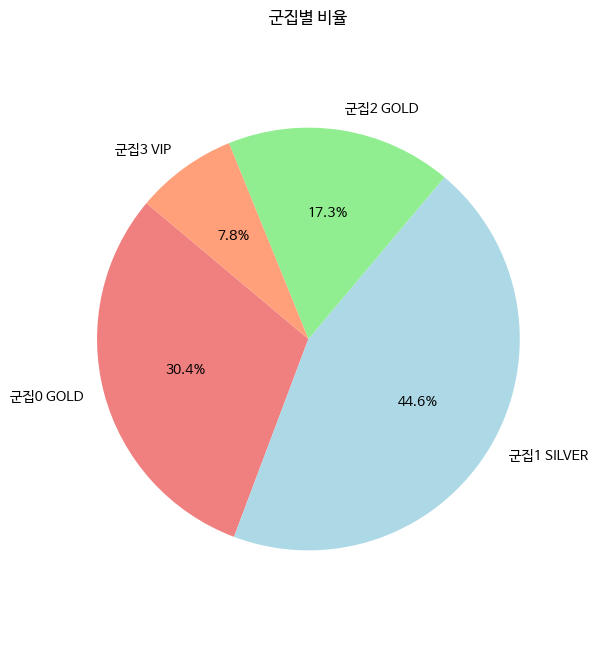

In [ ]:
import matplotlib.pyplot as plt

# 군집 종류
cluster_labels = ['군집0 GOLD', '군집1 SILVER', '군집2 GOLD', '군집3 VIP']

# 군집 비율
cluster_percentages = cluster_ratio_counts['비율']

# 색상 설정
colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightsalmon']

# 파이 차트 그리기
plt.figure(figsize=(6, 8))
plt.pie(cluster_percentages, labels=cluster_labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.axis('equal')  # 원을 원형으로 유지
plt.title('군집별 비율')
plt.show()

### **LTV**

In [ ]:
# B(수익): {구매품목(가격) * 개수} +
# {구매품목(가격) * 개수} +
# {구매품목(가격) * 개수} + ...
# -> 총구매금액

# C(유지비용 대비 수익률):
# 1안(기각)
# 고객 1인당 유지비용(고객 획득 비용) 가정: 30000원

# 2안(채택)
# 고객 1인당 유지비용(고객 획득 비용) = 마케팅비 / 구매고객수 = 18,575원
# 마케팅비는 online_diet 데이터의 총매출액(p_price 변수열의 모든 합)의 30%로 산정
# 기간 = 고객 ID 생성일 ~ 첫 구매일
# C = B/(기간 * 고객 획득 비용)

# LTV = B - C

In [ ]:
# 데이터 불러오기
clstr

,id,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수,군집
0,2094paco,24,90000.0,306,57,1,90000.0,1,0
1,kypung1111,32,90000.0,16,7,1,90000.0,1,1
2,blueseagul,20,920000.0,363,90,2,460000.0,1,0
3,shy1108,38,320000.0,90,89,1,320000.0,1,1
4,hisugi78,24,320000.0,217,88,1,320000.0,1,2
...,...,...,...,...,...,...,...,...,...
3296,juna7663,47,115000.0,313,66,1,115000.0,1,0
3297,jsunrose,31,115000.0,82,64,1,115000.0,1,1
3298,altjs5017,20,115000.0,124,57,1,115000.0,1,2
3299,voraangel,24,115000.0,222,53,1,115000.0,1,2


In [ ]:
import pandas as pd

# cluster0 데이터프레임과 df 데이터프레임을 'id'를 기준으로 병합
cluster0 = clstr.merge(df[['id', 'created', 'p_created']], on='id', how='inner')

# 결과 출력
cluster0

,id,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수,군집,created,p_created
0,2094paco,24,90000.0,306,57,1,90000.0,1,0,2000-10-27,2001-07-02
1,kypung1111,32,90000.0,16,7,1,90000.0,1,1,2001-08-13,2001-08-21
2,blueseagul,20,920000.0,363,90,2,460000.0,1,0,2000-08-31,2001-05-30
3,blueseagul,20,920000.0,363,90,2,460000.0,1,0,2000-08-31,2001-05-25
4,shy1108,38,320000.0,90,89,1,320000.0,1,1,2001-05-31,2001-05-31
...,...,...,...,...,...,...,...,...,...,...,...
4377,juna7663,47,115000.0,313,66,1,115000.0,1,0,2000-10-20,2001-06-23
4378,jsunrose,31,115000.0,82,64,1,115000.0,1,1,2001-06-08,2001-06-25
4379,altjs5017,20,115000.0,124,57,1,115000.0,1,2,2001-04-27,2001-07-02
4380,voraangel,24,115000.0,222,53,1,115000.0,1,2,2001-01-19,2001-07-06


### **군집0 LTV = 89362원**

In [ ]:
# 현재 데이터 cluster0, 군집이 0인 행만 추출
cluster1 = cluster0[cluster0['군집'] == 0]
cluster1

,id,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수,군집,created,p_created
0,2094paco,24,90000.0,306,57,1,90000.0,1,0,2000-10-27,2001-07-02
2,blueseagul,20,920000.0,363,90,2,460000.0,1,0,2000-08-31,2001-05-30
3,blueseagul,20,920000.0,363,90,2,460000.0,1,0,2000-08-31,2001-05-25
18,sm1995,25,320000.0,292,39,1,320000.0,1,0,2000-11-10,2001-07-20
46,alali,28,600000.0,320,77,1,600000.0,1,0,2000-10-13,2001-06-12
...,...,...,...,...,...,...,...,...,...,...,...
4366,kimeuna,25,130000.0,393,67,1,130000.0,1,0,2000-08-01,2001-06-22
4368,tina76,25,130000.0,326,60,1,130000.0,1,0,2000-10-07,2001-06-29
4369,kmo0224,31,130000.0,292,59,1,130000.0,1,0,2000-11-10,2001-06-30
4376,sc9632,24,130000.0,328,1,1,130000.0,1,0,2000-10-05,2001-08-27


In [ ]:
# 군집0의 기간 계산
import pandas as pd

# 'created'와 'p_created' 열을 날짜로 변환
cluster1['created'] = pd.to_datetime(cluster1['created'])
cluster1['p_created'] = pd.to_datetime(cluster1['p_created'])

# 최초 가입일부터 첫 구매일까지의 기간을 일수로 계산
cluster1['duration2'] = (cluster1['p_created'] - cluster1['created']).dt.total_seconds() / (60 * 60 * 24)

# 결과 출력
cluster1

<ipython-input-51-d835d94a950b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1['created'] = pd.to_datetime(cluster1['created'])
<ipython-input-51-d835d94a950b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1['p_created'] = pd.to_datetime(cluster1['p_created'])
<ipython-input-51-d835d94a950b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

,id,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수,군집,created,p_created,duration2
0,2094paco,24,90000.0,306,57,1,90000.0,1,0,2000-10-27,2001-07-02,248.0
2,blueseagul,20,920000.0,363,90,2,460000.0,1,0,2000-08-31,2001-05-30,272.0
3,blueseagul,20,920000.0,363,90,2,460000.0,1,0,2000-08-31,2001-05-25,267.0
18,sm1995,25,320000.0,292,39,1,320000.0,1,0,2000-11-10,2001-07-20,252.0
46,alali,28,600000.0,320,77,1,600000.0,1,0,2000-10-13,2001-06-12,242.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4366,kimeuna,25,130000.0,393,67,1,130000.0,1,0,2000-08-01,2001-06-22,325.0
4368,tina76,25,130000.0,326,60,1,130000.0,1,0,2000-10-07,2001-06-29,265.0
4369,kmo0224,31,130000.0,292,59,1,130000.0,1,0,2000-11-10,2001-06-30,232.0
4376,sc9632,24,130000.0,328,1,1,130000.0,1,0,2000-10-05,2001-08-27,326.0


In [ ]:
# LTV 계산
import pandas as pd

# B(고객의 총구매금액) 계산
cluster1['B'] = cluster1['총구매금액']

# 고객생애주기(LTV) 계산
# 가입 당일 날 물품을 구매한 경우 duration2 값이 0이 되어 LTV 값이 무한대 값이 나옴
# 이를 방지하기 위해 +1 설정
cluster1['LTV'] = cluster1['B'] - (cluster1['B'] / ((cluster1['duration2'] + 1) * 18575))

# 결과 출력
cluster1

<ipython-input-52-ada8d7d3e837>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1['B'] = cluster1['총구매금액']
<ipython-input-52-ada8d7d3e837>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1['LTV'] = cluster1['B'] - (cluster1['B'] / ((cluster1['duration2'] + 1) * 18575))


,id,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수,군집,created,p_created,duration2,B,LTV
0,2094paco,24,90000.0,306,57,1,90000.0,1,0,2000-10-27,2001-07-02,248.0,90000.0,89999.980541
2,blueseagul,20,920000.0,363,90,2,460000.0,1,0,2000-08-31,2001-05-30,272.0,920000.0,919999.818575
3,blueseagul,20,920000.0,363,90,2,460000.0,1,0,2000-08-31,2001-05-25,267.0,920000.0,919999.815191
18,sm1995,25,320000.0,292,39,1,320000.0,1,0,2000-11-10,2001-07-20,252.0,320000.0,319999.931907
46,alali,28,600000.0,320,77,1,600000.0,1,0,2000-10-13,2001-06-12,242.0,600000.0,599999.867072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4366,kimeuna,25,130000.0,393,67,1,130000.0,1,0,2000-08-01,2001-06-22,325.0,130000.0,129999.978532
4368,tina76,25,130000.0,326,60,1,130000.0,1,0,2000-10-07,2001-06-29,265.0,130000.0,129999.973689
4369,kmo0224,31,130000.0,292,59,1,130000.0,1,0,2000-11-10,2001-06-30,232.0,130000.0,129999.969963
4376,sc9632,24,130000.0,328,1,1,130000.0,1,0,2000-10-05,2001-08-27,326.0,130000.0,129999.978597


In [ ]:
cluster1.describe()

# 군집0의 평균 LTV =  89362.89원

,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수,군집,duration2,B,LTV
count,1337.000000,1.337000e+03,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.0,1337.000000,1.337000e+03,1.337000e+03
mean,24.549738,8.936290e+04,340.566193,46.575916,2.002244,41098.878085,1.467464,0.0,292.959611,8.936290e+04,8.936289e+04
std,4.748065,1.693508e+05,54.394107,29.118879,2.310318,52370.372752,1.116304,0.0,61.664972,1.693508e+05,1.693508e+05
min,14.000000,7.300000e+03,257.000000,0.000000,1.000000,4950.000000,1.000000,0.0,165.000000,7.300000e+03,7.299999e+03
25%,21.000000,1.990000e+04,302.000000,22.000000,1.000000,19500.000000,1.000000,0.0,245.000000,1.990000e+04,1.990000e+04
50%,24.000000,3.900000e+04,324.000000,41.000000,1.000000,24700.000000,1.000000,0.0,287.000000,3.900000e+04,3.899999e+04
75%,27.000000,7.850000e+04,380.000000,77.000000,2.000000,39900.000000,2.000000,0.0,335.000000,7.850000e+04,7.849998e+04
max,56.000000,1.331400e+06,567.000000,97.000000,16.000000,600000.000000,8.000000,0.0,508.000000,1.331400e+06,1.331400e+06


### **군집1 LTV = 54826원**

In [ ]:
# 현재 데이터 cluster0, 군집이 1인 행만 추출
cluster2 = cluster0[cluster0['군집'] == 1]
cluster2

,id,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수,군집,created,p_created
1,kypung1111,32,90000.0,16,7,1,90000.0,1,1,2001-08-13,2001-08-21
4,shy1108,38,320000.0,90,89,1,320000.0,1,1,2001-05-31,2001-05-31
6,941119,28,920000.0,83,81,2,460000.0,1,1,2001-06-07,2001-06-08
7,941119,28,920000.0,83,81,2,460000.0,1,1,2001-06-07,2001-06-07
9,CYK0316,40,544000.0,77,76,2,272000.0,1,1,2001-06-13,2001-06-13
...,...,...,...,...,...,...,...,...,...,...,...
4373,paa2614,22,130000.0,25,24,1,130000.0,1,1,2001-08-04,2001-08-04
4374,hearan78,24,130000.0,15,14,1,130000.0,1,1,2001-08-14,2001-08-14
4375,osy0741,27,130000.0,3,2,1,130000.0,1,1,2001-08-26,2001-08-26
4378,jsunrose,31,115000.0,82,64,1,115000.0,1,1,2001-06-08,2001-06-25


In [ ]:
# 군집1의 기간 계산
import pandas as pd

# 'created'와 'p_created' 열을 날짜로 변환
cluster2['created'] = pd.to_datetime(cluster2['created'])
cluster2['p_created'] = pd.to_datetime(cluster2['p_created'])

# 최초 가입일부터 첫 구매일까지의 기간을 일수로 계산
cluster2['duration2'] = (cluster2['p_created'] - cluster2['created']).dt.total_seconds() / (60 * 60 * 24)

# 결과 출력
cluster2

<ipython-input-55-bcca9d8a915a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster2['created'] = pd.to_datetime(cluster2['created'])
<ipython-input-55-bcca9d8a915a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster2['p_created'] = pd.to_datetime(cluster2['p_created'])
<ipython-input-55-bcca9d8a915a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

,id,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수,군집,created,p_created,duration2
1,kypung1111,32,90000.0,16,7,1,90000.0,1,1,2001-08-13,2001-08-21,8.0
4,shy1108,38,320000.0,90,89,1,320000.0,1,1,2001-05-31,2001-05-31,0.0
6,941119,28,920000.0,83,81,2,460000.0,1,1,2001-06-07,2001-06-08,1.0
7,941119,28,920000.0,83,81,2,460000.0,1,1,2001-06-07,2001-06-07,0.0
9,CYK0316,40,544000.0,77,76,2,272000.0,1,1,2001-06-13,2001-06-13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4373,paa2614,22,130000.0,25,24,1,130000.0,1,1,2001-08-04,2001-08-04,0.0
4374,hearan78,24,130000.0,15,14,1,130000.0,1,1,2001-08-14,2001-08-14,0.0
4375,osy0741,27,130000.0,3,2,1,130000.0,1,1,2001-08-26,2001-08-26,0.0
4378,jsunrose,31,115000.0,82,64,1,115000.0,1,1,2001-06-08,2001-06-25,17.0


In [ ]:
# LTV 계산
import pandas as pd

# B(고객의 총구매금액) 계산
cluster2['B'] = cluster2['총구매금액']

# 고객생애주기(LTV) 계산
# 가입 당일 날 물품을 구매한 경우 duration2 값이 0이 되어 LTV 값이 무한대 값이 나옴
# 이를 방지하기 위해 +1 설정
cluster2['LTV'] = cluster2['B'] - (cluster2['B'] / ((cluster2['duration2'] + 1) * 18575))

# 결과 출력
cluster2

<ipython-input-56-05010065da20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster2['B'] = cluster2['총구매금액']
<ipython-input-56-05010065da20>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster2['LTV'] = cluster2['B'] - (cluster2['B'] / ((cluster2['duration2'] + 1) * 18575))


,id,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수,군집,created,p_created,duration2,B,LTV
1,kypung1111,32,90000.0,16,7,1,90000.0,1,1,2001-08-13,2001-08-21,8.0,90000.0,89999.461642
4,shy1108,38,320000.0,90,89,1,320000.0,1,1,2001-05-31,2001-05-31,0.0,320000.0,319982.772544
6,941119,28,920000.0,83,81,2,460000.0,1,1,2001-06-07,2001-06-08,1.0,920000.0,919975.235532
7,941119,28,920000.0,83,81,2,460000.0,1,1,2001-06-07,2001-06-07,0.0,920000.0,919950.471063
9,CYK0316,40,544000.0,77,76,2,272000.0,1,1,2001-06-13,2001-06-13,0.0,544000.0,543970.713324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,paa2614,22,130000.0,25,24,1,130000.0,1,1,2001-08-04,2001-08-04,0.0,130000.0,129993.001346
4374,hearan78,24,130000.0,15,14,1,130000.0,1,1,2001-08-14,2001-08-14,0.0,130000.0,129993.001346
4375,osy0741,27,130000.0,3,2,1,130000.0,1,1,2001-08-26,2001-08-26,0.0,130000.0,129993.001346
4378,jsunrose,31,115000.0,82,64,1,115000.0,1,1,2001-06-08,2001-06-25,17.0,115000.0,114999.656049


In [ ]:
cluster2.describe()

# 군집1의 평균 LTV =  54826원

,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수,군집,duration2,B,LTV
count,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.0,1636.0,1636.000000,1636.000000,1636.000000
mean,25.758557,54828.025672,40.644866,34.102689,1.251834,44063.661369,1.0,1.0,5.916870,54828.025672,54826.096023
std,6.432031,91778.136309,30.060435,27.425950,0.624791,73794.971833,0.0,0.0,15.532204,91778.136309,91775.458850
min,13.000000,7300.000000,1.000000,0.000000,1.000000,6450.000000,1.0,1.0,0.000000,7300.000000,7299.606999
25%,21.000000,15000.000000,16.000000,13.000000,1.000000,14000.000000,1.0,1.0,0.000000,15000.000000,14999.781292
50%,25.000000,20900.000000,28.000000,23.000000,1.000000,19500.000000,1.0,1.0,0.000000,20900.000000,20898.874832
75%,29.000000,48900.000000,71.000000,55.000000,1.000000,29900.000000,1.0,1.0,2.000000,48900.000000,48897.367429
max,55.000000,920000.000000,109.000000,97.000000,5.000000,600000.000000,1.0,1.0,101.000000,920000.000000,919975.235532


### **군집2 LTV = 61159원**

In [ ]:
# 현재 데이터 cluster0, 군집이 2인 행만 추출
cluster3 = cluster0[cluster0['군집'] == 2]
cluster3

,id,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수,군집,created,p_created
5,hisugi78,24,320000.0,217,88,1,320000.0,1,2,2001-01-24,2001-06-01
8,minji1005,21,320000.0,157,77,1,320000.0,1,2,2001-03-25,2001-06-12
41,hwang275,36,600000.0,176,97,1,600000.0,1,2,2001-03-06,2001-05-23
42,MYHEE001,24,600000.0,191,96,1,600000.0,1,2,2001-02-19,2001-05-24
44,tortugita,23,635000.0,194,91,2,317500.0,2,2,2001-02-16,2001-05-29
...,...,...,...,...,...,...,...,...,...,...,...
4356,hych2002,29,130000.0,114,90,1,130000.0,1,2,2001-05-07,2001-05-30
4360,wife,29,130000.0,197,77,1,130000.0,1,2,2001-02-13,2001-06-12
4365,ys5028,39,130000.0,120,68,1,130000.0,1,2,2001-05-01,2001-06-21
4379,altjs5017,20,115000.0,124,57,1,115000.0,1,2,2001-04-27,2001-07-02


In [ ]:
# 군집2의 기간 계산
import pandas as pd

# 'created'와 'p_created' 열을 날짜로 변환
cluster3['created'] = pd.to_datetime(cluster3['created'])
cluster3['p_created'] = pd.to_datetime(cluster3['p_created'])

# 최초 가입일부터 첫 구매일까지의 기간을 일수로 계산
cluster3['duration2'] = (cluster3['p_created'] - cluster3['created']).dt.total_seconds() / (60 * 60 * 24)

# 결과 출력
cluster3

<ipython-input-59-f4054546b318>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster3['created'] = pd.to_datetime(cluster3['created'])
<ipython-input-59-f4054546b318>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster3['p_created'] = pd.to_datetime(cluster3['p_created'])
<ipython-input-59-f4054546b318>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

,id,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수,군집,created,p_created,duration2
5,hisugi78,24,320000.0,217,88,1,320000.0,1,2,2001-01-24,2001-06-01,128.0
8,minji1005,21,320000.0,157,77,1,320000.0,1,2,2001-03-25,2001-06-12,79.0
41,hwang275,36,600000.0,176,97,1,600000.0,1,2,2001-03-06,2001-05-23,78.0
42,MYHEE001,24,600000.0,191,96,1,600000.0,1,2,2001-02-19,2001-05-24,94.0
44,tortugita,23,635000.0,194,91,2,317500.0,2,2,2001-02-16,2001-05-29,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4356,hych2002,29,130000.0,114,90,1,130000.0,1,2,2001-05-07,2001-05-30,23.0
4360,wife,29,130000.0,197,77,1,130000.0,1,2,2001-02-13,2001-06-12,119.0
4365,ys5028,39,130000.0,120,68,1,130000.0,1,2,2001-05-01,2001-06-21,51.0
4379,altjs5017,20,115000.0,124,57,1,115000.0,1,2,2001-04-27,2001-07-02,66.0


In [ ]:
# LTV 계산
import pandas as pd

# B(고객의 총구매금액) 계산
cluster3['B'] = cluster3['총구매금액']

# 고객생애주기(LTV) 계산
# 가입 당일 날 물품을 구매한 경우 duration2 값이 0이 되어 LTV 값이 무한대 값이 나옴
# 이를 방지하기 위해 +1 설정
cluster3['LTV'] = cluster3['B'] - (cluster3['B'] / ((cluster3['duration2'] + 1) * 18575))

# 결과 출력
cluster3

<ipython-input-60-008e603639b8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster3['B'] = cluster3['총구매금액']
<ipython-input-60-008e603639b8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster3['LTV'] = cluster3['B'] - (cluster3['B'] / ((cluster3['duration2'] + 1) * 18575))


,id,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수,군집,created,p_created,duration2,B,LTV
5,hisugi78,24,320000.0,217,88,1,320000.0,1,2,2001-01-24,2001-06-01,128.0,320000.0,319999.866454
8,minji1005,21,320000.0,157,77,1,320000.0,1,2,2001-03-25,2001-06-12,79.0,320000.0,319999.784657
41,hwang275,36,600000.0,176,97,1,600000.0,1,2,2001-03-06,2001-05-23,78.0,600000.0,599999.591121
42,MYHEE001,24,600000.0,191,96,1,600000.0,1,2,2001-02-19,2001-05-24,94.0,600000.0,599999.659984
44,tortugita,23,635000.0,194,91,2,317500.0,2,2,2001-02-16,2001-05-29,102.0,635000.0,634999.668100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,hych2002,29,130000.0,114,90,1,130000.0,1,2,2001-05-07,2001-05-30,23.0,130000.0,129999.708389
4360,wife,29,130000.0,197,77,1,130000.0,1,2,2001-02-13,2001-06-12,119.0,130000.0,129999.941678
4365,ys5028,39,130000.0,120,68,1,130000.0,1,2,2001-05-01,2001-06-21,51.0,130000.0,129999.865410
4379,altjs5017,20,115000.0,124,57,1,115000.0,1,2,2001-04-27,2001-07-02,66.0,115000.0,114999.907595


In [ ]:
cluster3.describe()

# 군집1의 평균 LTV =  61159원

,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수,군집,duration2,B,LTV
count,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.0,687.000000,687.000000,687.000000
mean,24.085881,61159.315866,171.107715,51.692868,1.422125,43996.797671,1.160116,2.0,118.997089,61159.315866,61159.278954
std,5.893112,87241.038037,39.366856,30.298616,0.747770,68631.918547,0.366981,0.0,49.546309,87241.038037,87240.985109
min,14.000000,9900.000000,101.000000,0.000000,1.000000,7250.000000,1.000000,2.0,13.000000,9900.000000,9899.995667
25%,21.000000,19500.000000,138.000000,25.000000,1.000000,19500.000000,1.000000,2.0,82.000000,19500.000000,19499.995480
50%,23.000000,29900.000000,168.000000,50.000000,1.000000,24900.000000,1.000000,2.0,118.000000,29900.000000,29899.981914
75%,27.000000,60000.000000,202.000000,82.000000,2.000000,40675.000000,1.000000,2.0,155.000000,60000.000000,59999.949128
max,102.000000,635000.000000,255.000000,98.000000,5.000000,600000.000000,2.000000,2.0,245.000000,635000.000000,634999.668100


### **군집3 LTV = 196132원**

In [ ]:
# 현재 데이터 cluster0, 군집이 3인 행만 추출
cluster5 = cluster0[cluster0['군집'] == 3]
cluster5

,id,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수,군집,created,p_created
13,edko,21,532000.0,76,50,5,106400.0,3,3,2001-06-14,2001-07-09
14,edko,21,532000.0,76,50,5,106400.0,3,3,2001-06-14,2001-08-03
15,edko,21,532000.0,76,50,5,106400.0,3,3,2001-06-14,2001-08-06
16,edko,21,532000.0,76,50,5,106400.0,3,3,2001-06-14,2001-06-14
17,edko,21,532000.0,76,50,5,106400.0,3,3,2001-06-14,2001-06-17
...,...,...,...,...,...,...,...,...,...,...,...
4154,queeni,29,230000.0,62,46,2,115000.0,2,3,2001-06-28,2001-07-13
4175,park1991,34,200000.0,81,80,2,100000.0,2,3,2001-06-09,2001-06-09
4176,park1991,34,200000.0,81,80,2,100000.0,2,3,2001-06-09,2001-06-09
4229,jhy2580,25,200000.0,22,21,2,100000.0,2,3,2001-08-07,2001-08-07


In [ ]:
# 군집2의 기간 계산
import pandas as pd

# 'created'와 'p_created' 열을 날짜로 변환
cluster5['created'] = pd.to_datetime(cluster5['created'])
cluster5['p_created'] = pd.to_datetime(cluster5['p_created'])

# 최초 가입일부터 첫 구매일까지의 기간을 일수로 계산
cluster5['duration2'] = (cluster5['p_created'] - cluster5['created']).dt.total_seconds() / (60 * 60 * 24)

# 결과 출력
cluster5

<ipython-input-63-eae375ea26a3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster5['created'] = pd.to_datetime(cluster5['created'])
<ipython-input-63-eae375ea26a3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster5['p_created'] = pd.to_datetime(cluster5['p_created'])
<ipython-input-63-eae375ea26a3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

,id,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수,군집,created,p_created,duration2
13,edko,21,532000.0,76,50,5,106400.0,3,3,2001-06-14,2001-07-09,25.0
14,edko,21,532000.0,76,50,5,106400.0,3,3,2001-06-14,2001-08-03,50.0
15,edko,21,532000.0,76,50,5,106400.0,3,3,2001-06-14,2001-08-06,53.0
16,edko,21,532000.0,76,50,5,106400.0,3,3,2001-06-14,2001-06-14,0.0
17,edko,21,532000.0,76,50,5,106400.0,3,3,2001-06-14,2001-06-17,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4154,queeni,29,230000.0,62,46,2,115000.0,2,3,2001-06-28,2001-07-13,15.0
4175,park1991,34,200000.0,81,80,2,100000.0,2,3,2001-06-09,2001-06-09,0.0
4176,park1991,34,200000.0,81,80,2,100000.0,2,3,2001-06-09,2001-06-09,0.0
4229,jhy2580,25,200000.0,22,21,2,100000.0,2,3,2001-08-07,2001-08-07,0.0


In [ ]:
# LTV 계산
import pandas as pd

# B(고객의 총구매금액) 계산
cluster5['B'] = cluster5['총구매금액']

# 고객생애주기(LTV) 계산
# 가입 당일 날 물품을 구매한 경우 duration2 값이 0이 되어 LTV 값이 무한대 값이 나옴
# 이를 방지하기 위해 +1 설정
cluster5['LTV'] = cluster5['B'] - (cluster5['B'] / ((cluster5['duration2'] + 1) * 18575))

# 결과 출력
cluster5

<ipython-input-64-0b9b86aaa5c0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster5['B'] = cluster5['총구매금액']
<ipython-input-64-0b9b86aaa5c0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster5['LTV'] = cluster5['B'] - (cluster5['B'] / ((cluster5['duration2'] + 1) * 18575))


,id,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수,군집,created,p_created,duration2,B,LTV
13,edko,21,532000.0,76,50,5,106400.0,3,3,2001-06-14,2001-07-09,25.0,532000.0,531998.898437
14,edko,21,532000.0,76,50,5,106400.0,3,3,2001-06-14,2001-08-03,50.0,532000.0,531999.438419
15,edko,21,532000.0,76,50,5,106400.0,3,3,2001-06-14,2001-08-06,53.0,532000.0,531999.469618
16,edko,21,532000.0,76,50,5,106400.0,3,3,2001-06-14,2001-06-14,0.0,532000.0,531971.359354
17,edko,21,532000.0,76,50,5,106400.0,3,3,2001-06-14,2001-06-17,3.0,532000.0,531992.839838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4154,queeni,29,230000.0,62,46,2,115000.0,2,3,2001-06-28,2001-07-13,15.0,230000.0,229999.226110
4175,park1991,34,200000.0,81,80,2,100000.0,2,3,2001-06-09,2001-06-09,0.0,200000.0,199989.232840
4176,park1991,34,200000.0,81,80,2,100000.0,2,3,2001-06-09,2001-06-09,0.0,200000.0,199989.232840
4229,jhy2580,25,200000.0,22,21,2,100000.0,2,3,2001-08-07,2001-08-07,0.0,200000.0,199989.232840


In [ ]:
cluster5.describe()

# 군집1의 평균 LTV =  196132원

,연령,총구매금액,가입기간,최종구매일 경과기간,총구매횟수,평균구매금액,구매제품종류수,군집,duration2,B,LTV
count,722.000000,7.220000e+02,722.000000,722.000000,722.000000,7.220000e+02,722.000000,722.0,722.000000,7.220000e+02,7.220000e+02
mean,27.101108,1.961350e+05,71.822715,42.860111,4.490305,5.201295e+04,2.432133,3.0,29.368421,1.961350e+05,1.961320e+05
std,7.339368,2.703896e+05,54.105067,30.056878,5.897934,9.281840e+04,0.796294,0.0,48.290441,2.703896e+05,2.703880e+05
min,16.000000,2.220000e+04,1.000000,0.000000,2.000000,1.110000e+04,1.000000,3.0,0.000000,2.220000e+04,2.219880e+04
25%,21.000000,5.170000e+04,26.000000,15.000000,2.000000,1.970000e+04,2.000000,3.0,0.000000,5.170000e+04,5.169977e+04
50%,26.000000,8.550000e+04,74.000000,35.000000,3.000000,2.701250e+04,2.000000,3.0,3.000000,8.550000e+04,8.549906e+04
75%,31.000000,2.212750e+05,102.000000,75.000000,4.000000,4.900000e+04,3.000000,3.0,48.000000,2.212750e+05,2.212660e+05
max,55.000000,3.000000e+06,296.000000,97.000000,31.000000,1.500000e+06,6.000000,3.0,287.000000,3.000000e+06,2.999998e+06
